In [1]:
# Import libraries 
from sklearn.datasets import load_iris
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython import display
plt.rcParams["figure.figsize"] = (40,10)
%matplotlib inline

First, let's load a simple data set about the Iris flower (this dataset is also available in Matlab).  For visualization purposes, we'll only use the first three features.  The dataset has three classes (0,1,2) but we'll set classes 1 and 2 both to 1 to make this linearly separable binary classification problem.  We are only going to perform training on the first 105 data samples and validate on the remaining 45 (This is called a 70/30 split).

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

# Often the data is stored in some order, so to ensure we have a fairly balanced train and validation set, shuffle the data first

rand_idx = np.random.permutation(len(y))
X = X[rand_idx, ...]
y = y[rand_idx]

X_tr = X[:105, ...]
y_tr = y[:105]
X_te = X[105:, ...]
y_te = y[105:]

print(f"There are {len(y_tr)} training data samples, and {len(y_te)} testing data samples")

There are 105 training data samples, and 45 testing data samples


Define the functions that calculate the sigmoid function and the loss function. Our loss function becomes:

![title](images/logistic_cost_function_vectorized.png)

We'll also optionally use L2-regularization (l2_loss).

In [3]:
def sigmoid(z):
    #print("z", z.shape)
    return 1 / (1 + np.exp(-z))

def compute_loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def l2_loss(W):
    return np.sum(W**2)


Compute the gradients using the formula:

\begin{equation}
\frac{\partial L}{\partial w_i} = (p_i - y_i) x_i
\end{equation}

Explanation how the derivation is found: https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression/477261#477261



In [4]:
def compute_gradient(X, h, y):
    dW = np.dot(X.T, (h - y)) / len(y)
    db = (h - y).mean(axis=0)
    return dW, db

Our final output is the probability the input belong to class y=1.  So we decide that if we're if the probability is at least 50%, then we assign the input X to that class.  Plot the input data and the decision boundary (Wx+b).    

In [5]:

def predict(pred, threshold=0.5):
    return (pred >= threshold)

def predict_prob(X, W, b):
    h = sigmoid(np.dot(X, W) + b)
    return h    

#https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
def plot(X, y, W, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend();
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = predict_prob(grid, W, b)
    print(probs.shape)
    probs = probs.reshape(xx1.shape)
    print(probs.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(1)

Define the parameters we are going to train.  There are two: W (weights) and b (bias).  The weights is a 2x1 matrix because we have 2 feature inputs and 1 output class. The bias is a 1x1 because we have 1 output class.

In [6]:
print("Initializing...")
num_class = 1 #
# Initialize W to very small random values. e.g. random values between -0.001 and 0.001
W = 2e-3 * (np.random.rand(X.shape[1]) - 0.5)
#W = np.zeros(X.shape[1])

# Initialize b to zeros
b = np.zeros(num_class)

print(f"X = {X.shape}")
print(f"W = {W.shape}")
print(f"b = {b.shape}")

Initializing...
X = (150, 2)
W = (2,)
b = (1,)


We are going to train for 20,000 loops.  This is called an epoch.  For each epoch we are going to going to calculate the gradients and perform gradient descent optimization.  If you modify the data to divide the training data in to chucks or "batches" of shuffled or randomized training data (i.e. you re-shuffle the data every epoch) then this is stochastic gradient descent.  The training then becomes non-deterministic.

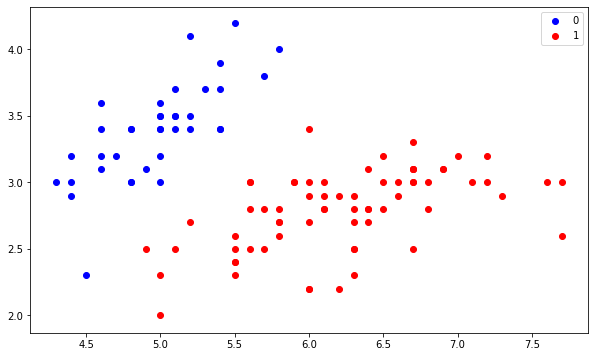

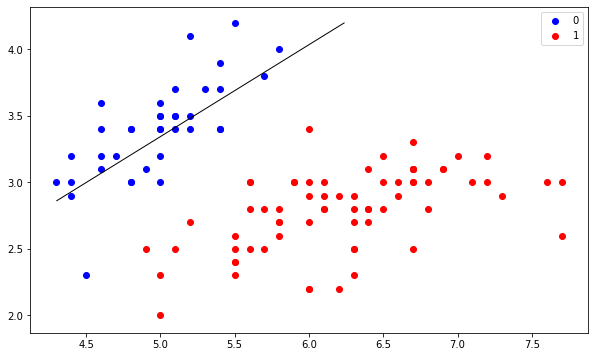

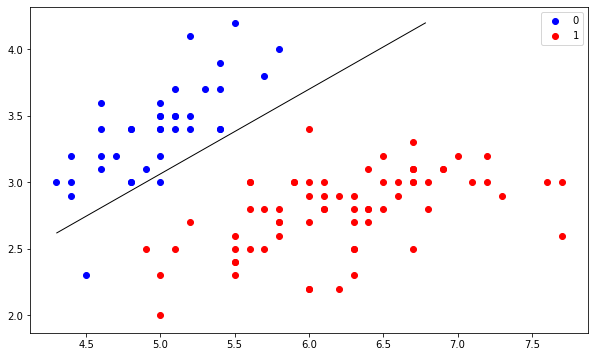

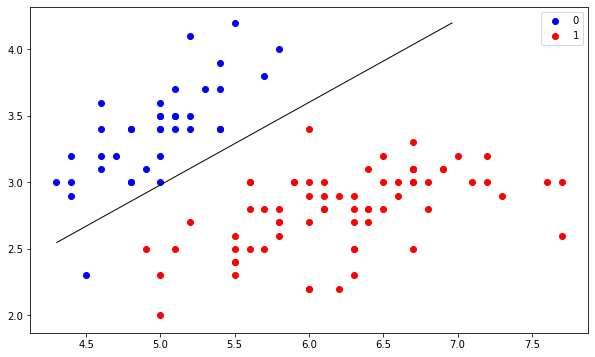

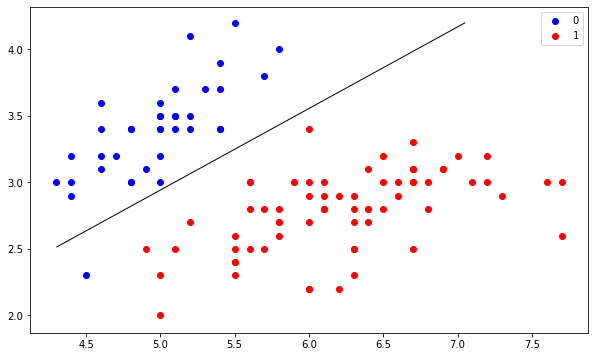

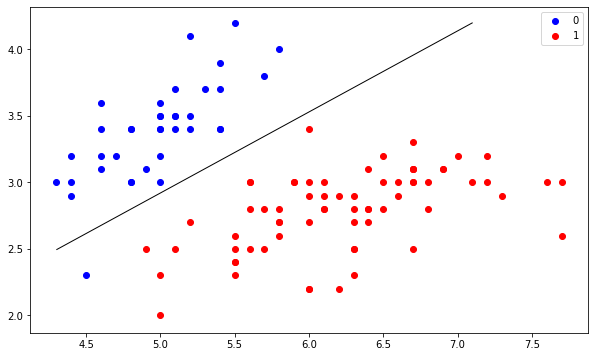

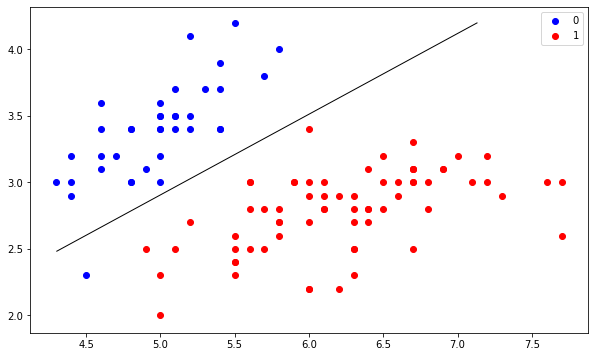

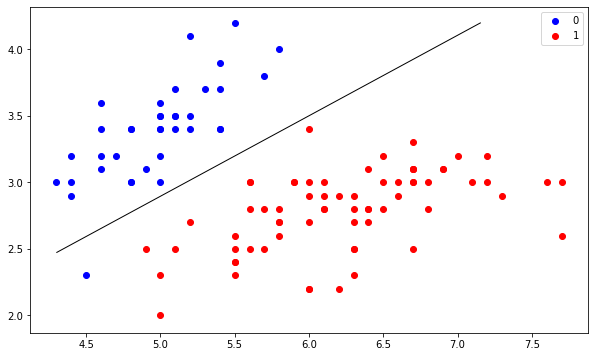

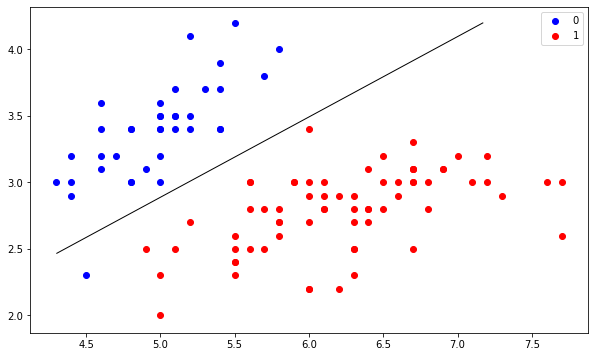

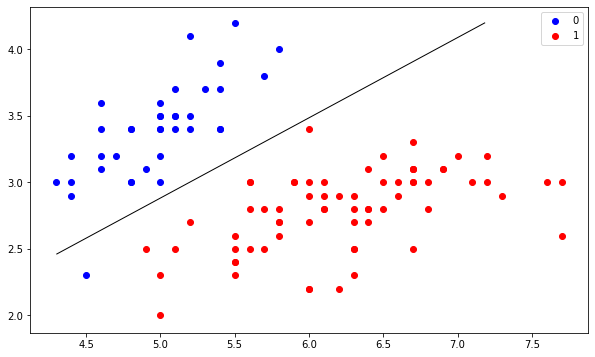

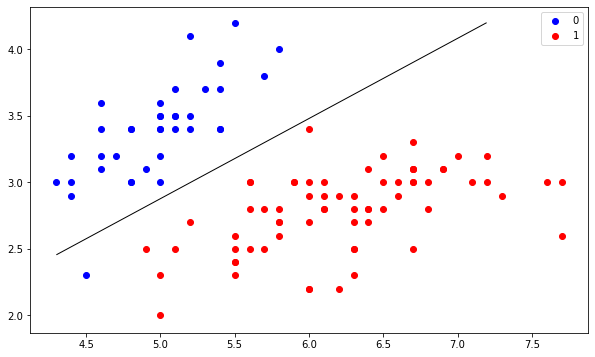

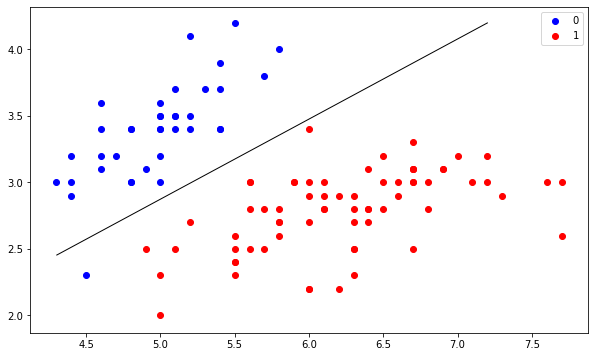

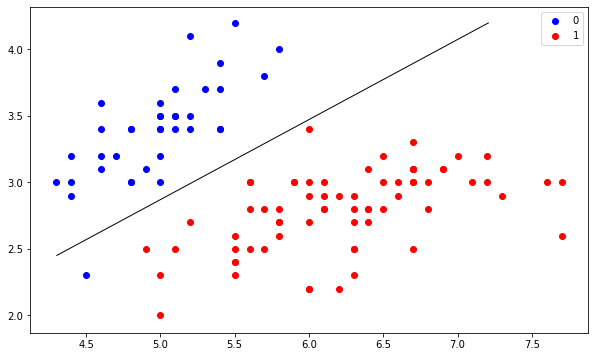

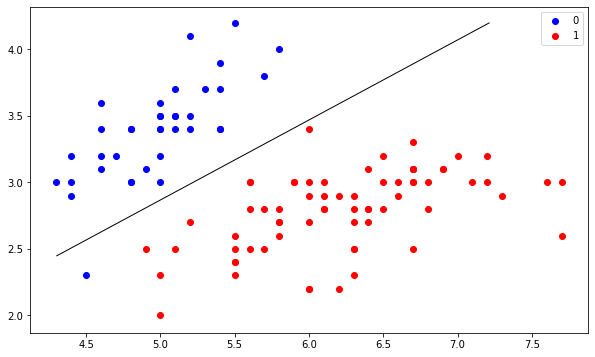

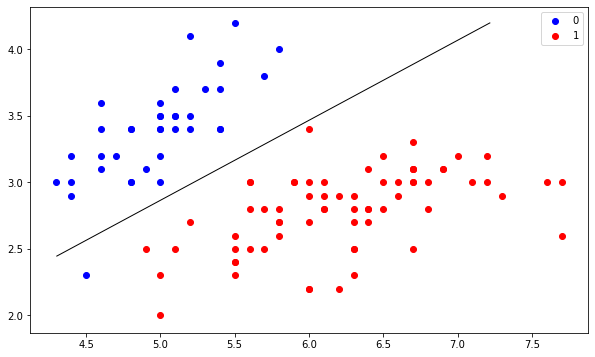

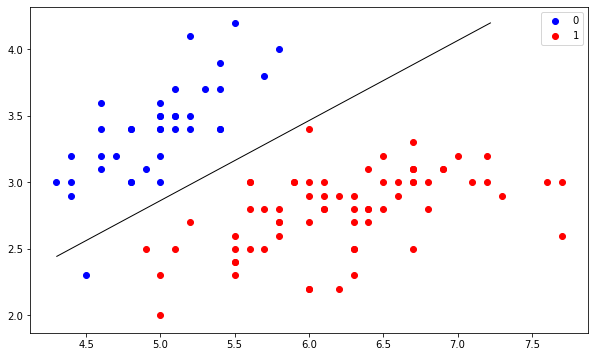

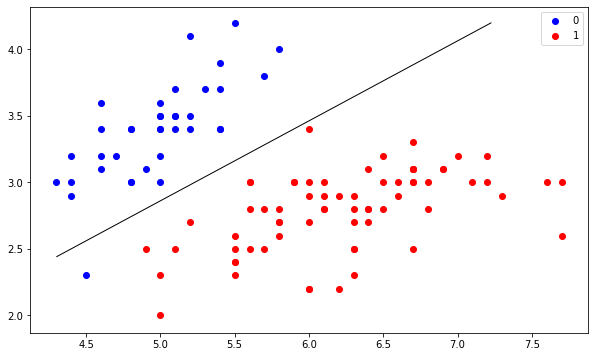

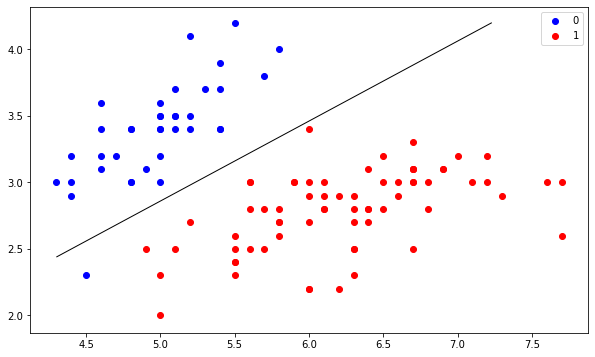

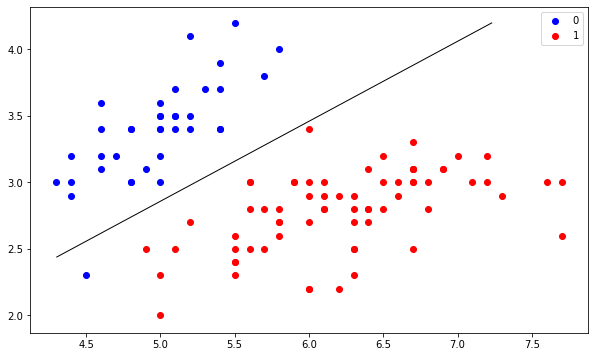

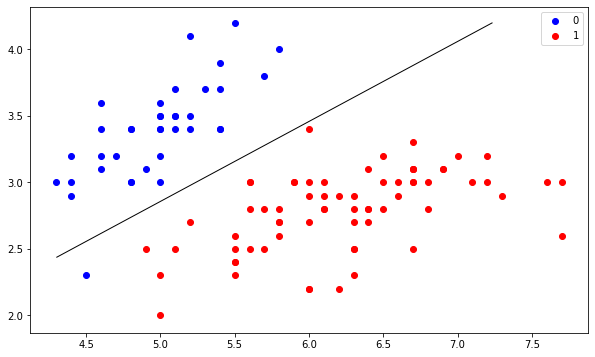

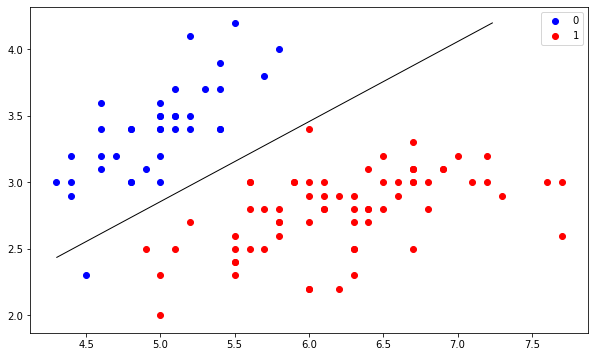

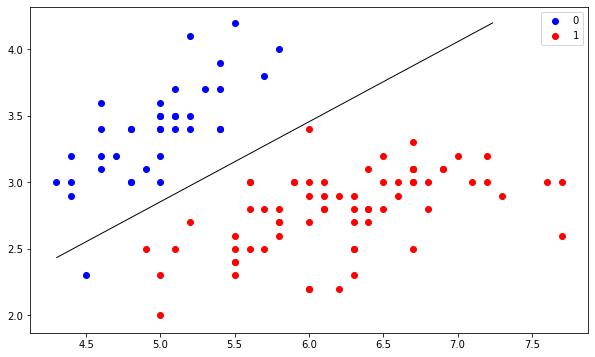

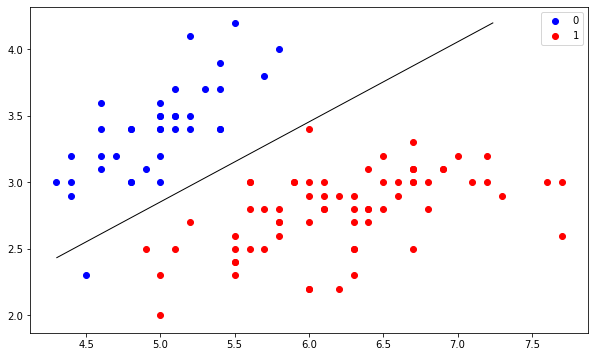

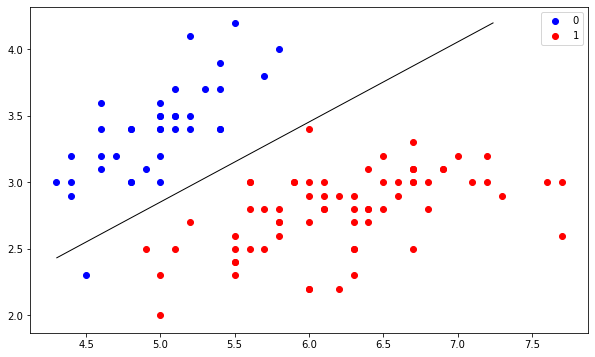

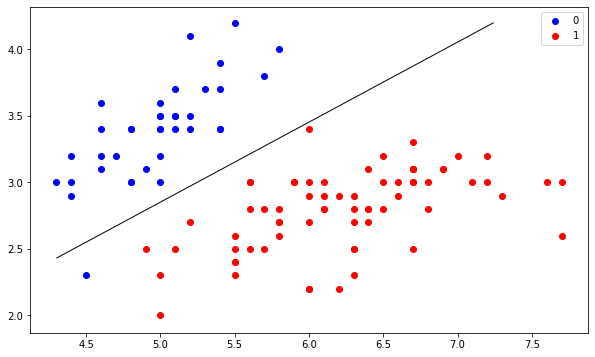

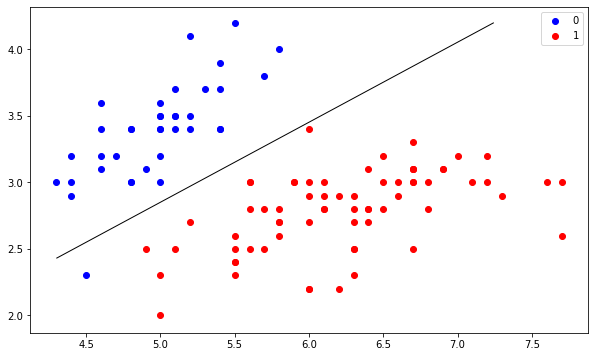

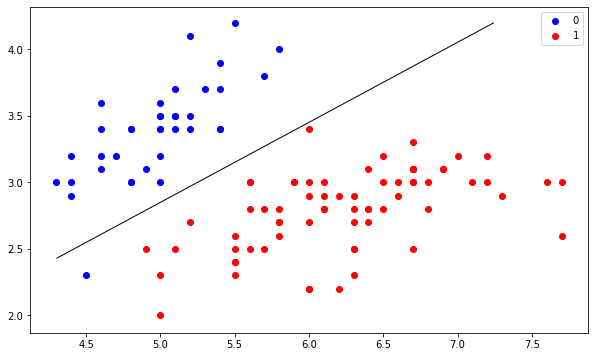

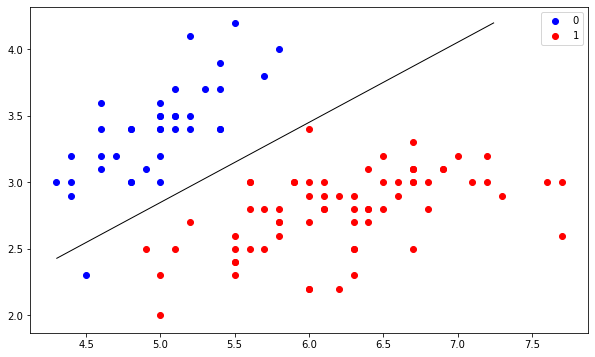

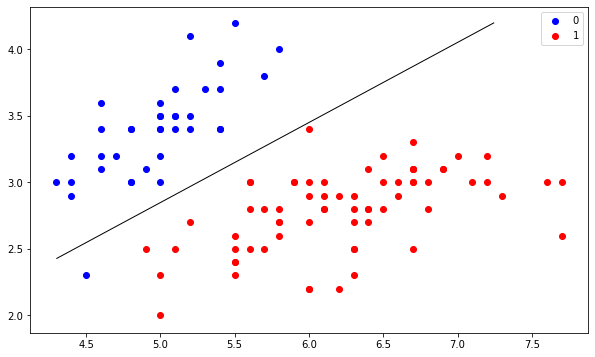

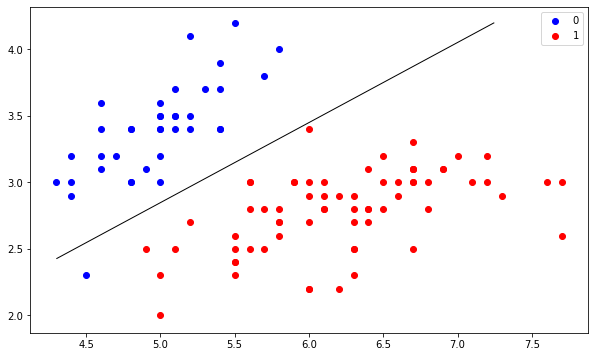

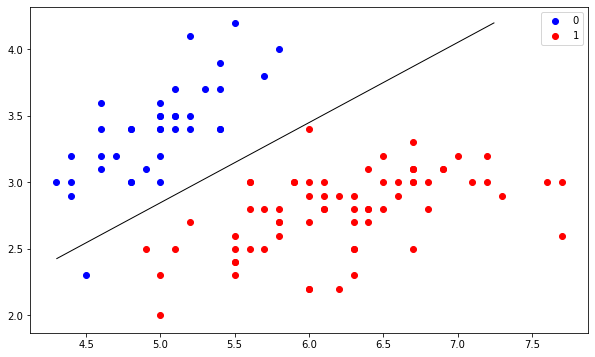

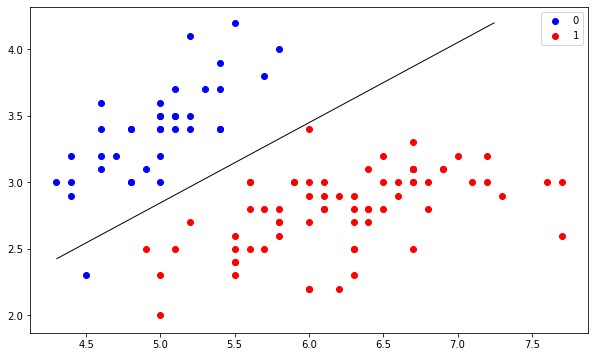

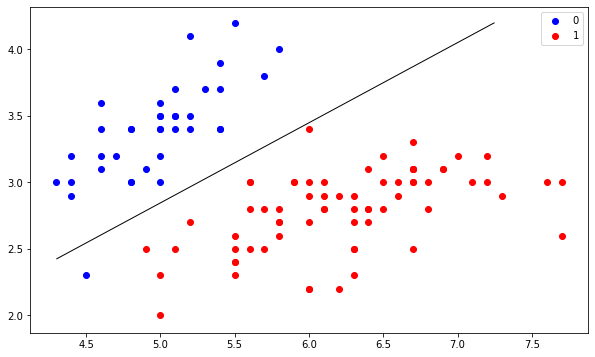

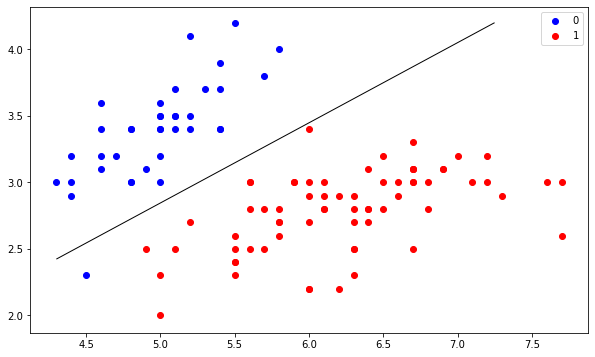

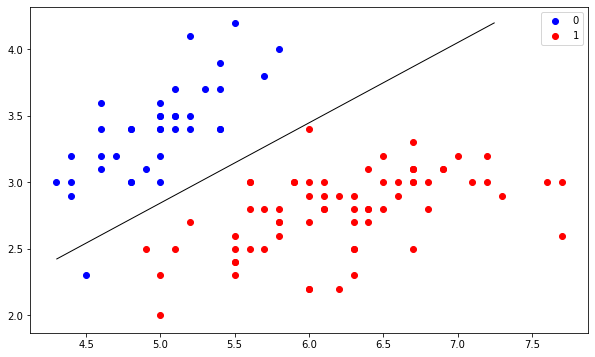

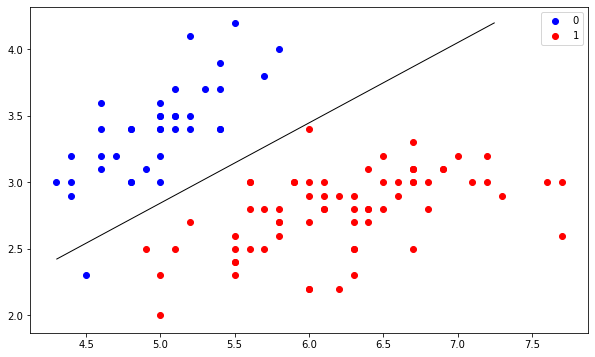

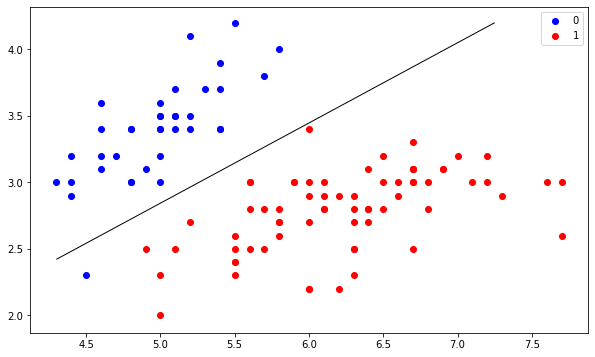

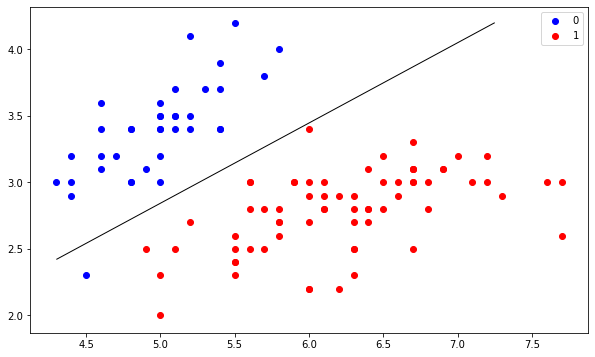

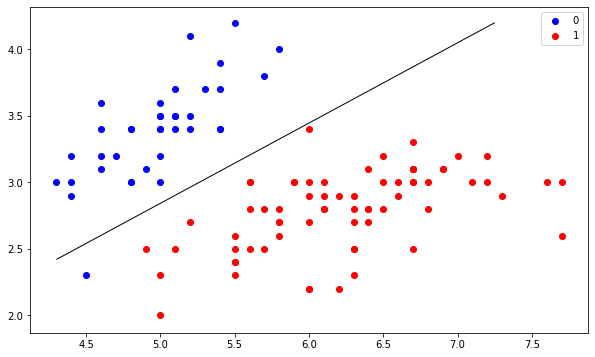

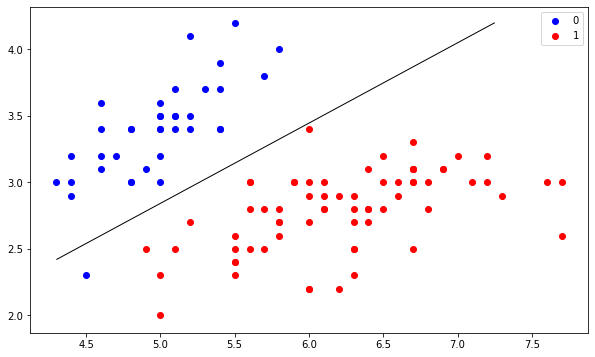

In [7]:
#Tuneable hyperparamters to c0ontrol different parts of the logistic regression training
num_epoch = 20000 #Maximum number of loops do we train for (safety check in case we never converge)
lambda_ = 0.1 #Control the importance of the regularization
learning_rate = 0.01 #How much do we update the gradients
use_l2_reg=False  #turn regularization on/off

for epoch in range(num_epoch):
    
    #Calculate the current hypothesis: sigmoid(Wx + b). This is also referred to as y_hat
    h = y_hat = predict_prob(X_tr, W, b)
    #Find the negative log likelihood, and add the regularization L2 loss
    loss = compute_loss(h, y_tr)
    
    if use_l2_reg:
        loss += lambda_ * l2_loss(W)
    
    
    #Calculate the gradients w.r.t W and w.r.t b
    dW, db = compute_gradient(X_tr, h, y_tr)
    
    if use_l2_reg:
        dW += lambda_ * 2. * W #Add regularization to the gradient as well
    
    #Update the W,b parameters by a learning rate factor and the gradients
    W_prev = W
    W = W - learning_rate * dW
    b = b - learning_rate * db
   
    if epoch % 500 == 0:
        #Let's see how we're doing by checking the accuracy for the training data
        y_hat = predict_prob(X_tr, W, b) 
        acc_tr = np.sum(predict(y_hat) == y_tr) / len(y_tr)
        print(f'Epoch {epoch}: loss = {loss}, acc_tr = {acc_tr}')
    
        plot(X_tr, y_tr, W, b)
        
    #Break out once convergence is reached
    if np.linalg.norm(W - W_prev) < 1e-6:
        print(f"Convergence reached at epoch {epoch}: {np.linalg.norm(W - W_prev)}")
        break

In [8]:
#How did we really do?  Check against the test dataset
y_hat = predict_prob(X_te, W, b)
acc_te = np.sum(predict(y_hat) == y_te) / len(y_te)
print(f"Final Weights: {W}   bias: {b}")
print(f"Test accuracy: {acc_te}")



Final Weights: [ 3.64121928 -6.03371816]   bias: [-1.06129768]
Test accuracy: 1.0


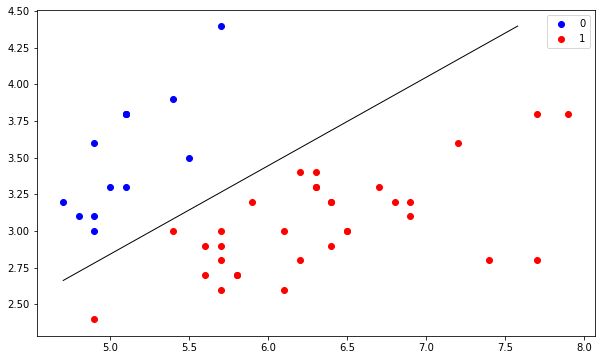

In [9]:
plot(X_te, y_te, W, b)